In [9]:
from mnist import MNIST
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import re
import cv2
import sklearn

In [10]:
batch_size = 32
img_height = 180
img_width = 180

In [11]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if not os.path.isfile(os.path.join(folder,filename)):
            continue
        img = cv2.imread(os.path.join(folder,filename),0)
        if img is not None:
            images.append(img)
    return images
def showImage(image):
    plt.imshow(image,cmap='gray')
    plt.show()
def get_training_data():
    path = './samples/DevanagariHandwrittenCharacterDataset/Train'
    regex = r'_(\d+)'
    characters = [(int(re.search(regex,name).group(1)),name,os.path.join(path,name)) for name in os.listdir(path) if os.path.isdir(os.path.join(path,name)) and name.startswith('character')]
    train_images = []
    train_labels = []
    for entry in characters:
        label,name,folder_path = entry
        imgs = load_images_from_folder(folder_path)
        train_labels.extend([label]*len(imgs))
        train_images.extend(imgs)
    train_images = np.array(train_images)
    train_labels = np.array(train_labels)
    return train_images,train_labels
def get_testing_data():
    path = './samples/DevanagariHandwrittenCharacterDataset/Test'
    regex = r'_(\d+)'
    characters = [(int(re.search(regex,name).group(1)),name,os.path.join(path,name)) for name in os.listdir(path) if os.path.isdir(os.path.join(path,name)) and name.startswith('character')]
    test_images = []
    test_labels = []
    for entry in characters:
        label,name,folder_path = entry
        imgs = load_images_from_folder(folder_path)
        test_labels.extend([label]*len(imgs))
        test_images.extend(imgs)
    test_images = np.array(train_images)
    test_labels = np.array(train_labels)
    return test_images,test_labels

In [12]:
train_images,train_labels = get_training_data()
test_images,test_labels = get_testing_data()
test_labels = test_labels - 1
train_labels = train_labels - 1
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((61200, 32, 32), (61200, 32, 32), (61200,), (61200,))

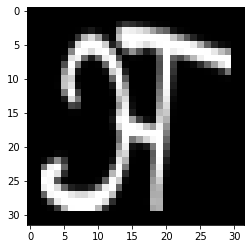

In [13]:
showImage(train_images[0])

In [14]:
train_images = train_images/255
test_images = test_images/255

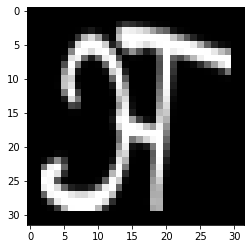

In [15]:
showImage(train_images[0])

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=()))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [39]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [26]:
def getCharFromLabel(label):
    alphabets = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह क्ष त्र ज्ञ'.split(' ')
    return alphabets[label]

In [27]:
alphabets = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह क्ष त्र ज्ञ'.split(' ')

In [40]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(alphabets)))

In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [42]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

ValueError: Error when checking input: expected conv2d_5_input to have 4 dimensions, but got array with shape (61200, 32, 32)